# Introduction to random sampling and hypothesis testing

## Chapter 2

### 2. 2 Confidence intervals

We just described the central limit theorem and how the states that the distribution of sample means, meaning the mean values computed for a set of different experiments, approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

Building confidence intervals. The Standard normal distribution and _standardized_ variables. The best single estimate of the population mean $\mu$ based on a sample of data is simply the sample mean, $\bar{x}$.

In [2]:
# Import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Standard normal distribution

Consider a random variable $Z$ followinf as a normal distribution, meaning a _gaussian with mean 0 and standard deviation 1_:

$$Z \sim N(0,1)$$

You will find if you check different literature that $Z$ is normally known as *normal distribution*, and also *standard normal distribution*.

In [3]:
# Standard normal distribution
Z = stats.norm(0,1)

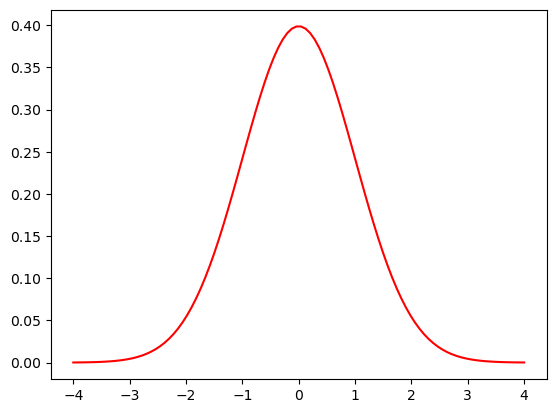

In [4]:
# Plot probability density function
x = np.linspace(-4, 4, 100)
plt.plot(x, Z.pdf(x), color = "r")

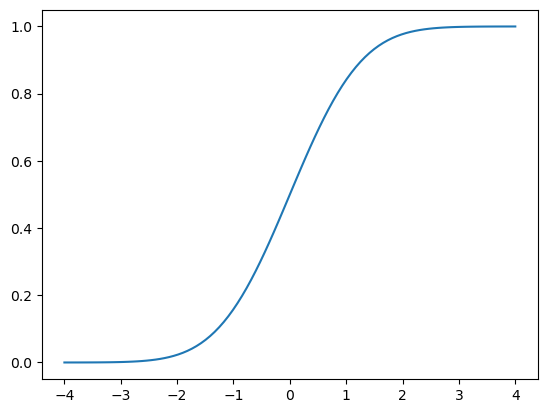

In [5]:
# Plot cumulative distribution function
plt.plot(x, Z.cdf(x))

Let's now compute how much of the probability mass lies within one, two, or three times the standard deviations. We can compute that by using the cumulative distribution, which - _review previous chapter_ - computes the sum of the probabilities up to a specific value.

In [6]:
# Probability between one sigma (at both sides from the mean)
Z.cdf(1) - Z.cdf(-1)

0.6826894921370859

In [7]:
# Probability between two sigmaa (at both sides from the mean)
Z.cdf(2) - Z.cdf(-2)

0.9544997361036416

In [8]:
# Probability between three sigmas (at both sides from the mean)
Z.cdf(3) - Z.cdf(-3)

0.9973002039367398

In real experiments, we will be often interested in the regions containing a certain percentage of the probability mass, for example, find the interval $z_{90}$, such that 90 per cent of the events lie inside.

$$\mathbb{P}(-z_{90} < z < z_{90}) = 0.9$$

This is referred as a confidence interval with _critical value_ 90. Python makes it easy for us to find these critical values of $z$, e.g.

In [9]:
# 90% confidence interval
region = Z.interval(0.9)
print(region)

(-1.6448536269514729, 1.6448536269514722)


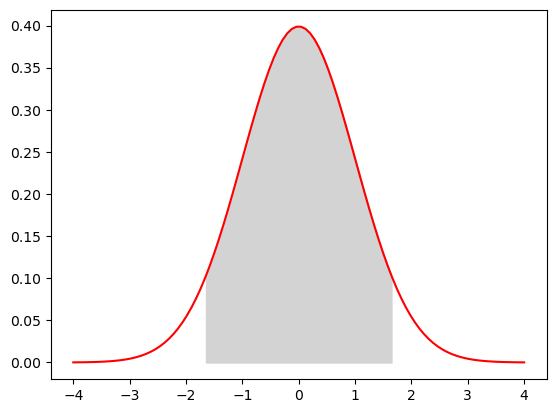

In [10]:
# Plot probability density function
plt.plot(x, Z.pdf(x), color = "r")

# Add shaded region containing 90% of the probability
x_region = np.linspace(region[0], region[1], 100)
plt.fill_between(x_region, Z.pdf(x_region), color = "lightgrey")

Find the corresponding regions for 95% and 99% of the probability mass.

In [11]:
# 95% confidence interval
Z.interval(.95)

(-1.959963984540054, 1.959963984540054)

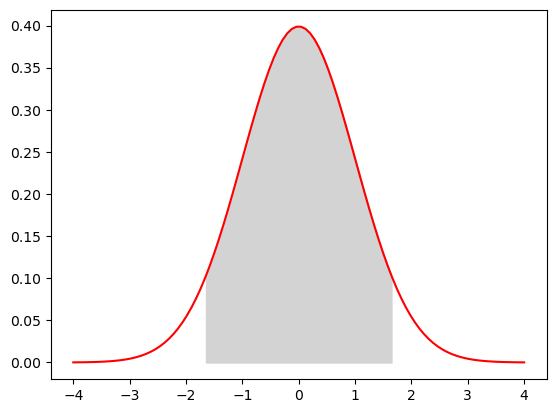

In [13]:
# Plot probability density function
plt.plot(x, Z.pdf(x), color = "r")

# Add shaded region containing 95% of the probability
x_region = np.linspace(region[0], region[1], 100)
plt.fill_between(x_region, Z.pdf(x_region), color = "lightgrey")

In [12]:
# 99% confidence interval
Z.interval(.99)

(-2.5758293035489004, 2.5758293035489004)

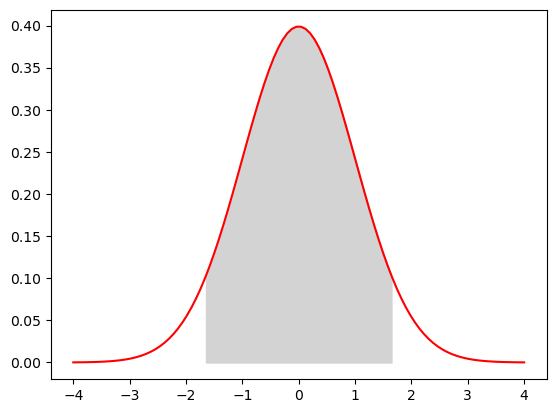

In [12]:
# Plot probability density function
plt.plot(x, Z.pdf(x), color = "r")

# Add shaded region containing 95% of the probability
x_region = np.linspace(region[0], region[1], 100)
plt.fill_between(x_region, Z.pdf(x_region), color = "lightgrey")

## 2.3 The Z-distribution and Student's t distribution.

### Z-score

Note that we can *standardize* any random variable by subtracting the mean and dividing by the standard deviation. When applied to a single observation, this is known as the *z-score*:

$$z =\frac{x-\mu}{\sigma}$$


### Back to confidence intervals

The best single estimate of the population mean $\mu$ based on a sample of data is simply the sample mean, $\bar{x}$.

However, it is often useful to describe the precision of our estimate by giving a *confidence interval* instead of a point estimate.

We say that the true mean lies within the interval with e.g. 90% confidence.

From the central limit theorem, $\bar{X} \sim N(\mu,\sigma^2/n)$

When $n$ is large (>30), we have $\sigma \approx s$, so $\bar{X} \sim N(\mu,s^2/n)$

Standardisation gives 
$$z = \frac{\bar{x}-\mu}{s/\sqrt{n}}$$

From the above critical value calculation, the 90\% confidence interval is where $-1.64 < z < 1.64$

Substituting for $z$, we have

$$\mathbb{P}\left(\bar{x}-1.64\frac{s}{\sqrt{n}} < \mu < \bar{x}+1.64\frac{s}{\sqrt{n}}\right) =  0.9$$



#### Example: speed of light

Below are the results of 64 measurements of the speed of light made by Simon Newcomb in 1882, in km/s.

In [19]:
# Observed data
data = np.array([265848, 256680, 248124, 310155, 265848, 201182, 232617,
       206770, 275694, 286297, 265848, 256680, 286297, 275694,
       338351, 323640, 372187, 297749, 297749, 206770, 323640,
       240120, 232617, 310155, 275694, 225568, 465233, 310155,
       256680, 206770, 354463, 265848, 286297, 275694, 275694,
       232617, 297749, 265848, 310155, 186093, 354463, 240120,
       232617, 265848, 286297, 248124, 275694, 286297, 310155,
       232617, 256680, 218933, 297749, 391775, 206770, 256680,
       248124, 338351, 265848, 225568, 190865, 297749, 465233,
       323640])

Based on these data, calculate a 95% confidence interval for the speed of light.

In [15]:
# First, calculate the sample mean and std
xbar = np.mean(data)
print(xbar)

# Use the ddof = 1 argument to use an unbiased estimator
s = np.std(data, ddof = 1)
print(s)

277866.671875
55638.32238894074


In [16]:
# Second, find the critical value
z95 = Z.interval(0.95)[1]
print(z95)

1.959963984540054


In [17]:
# Finally calculate the 95% confidence interval for mu
ci = np.array([xbar - z95 * s / np.sqrt(64) , xbar + z95 * s / np.sqrt(64)])
print(ci)

[264235.53336968 291497.81038032]


### Confidence intervals for small $n$

The central limit theorem only applies when $n$ is large. For small samples ($n$<30), the normal distribution is not a good approximation to the sampling distribution of the mean, because our estimate of the population variance is likely to be poor.

However, for situations where the *population* is expected to be normally distributed, we can use **Student's t-distribution** to construct an appropriate confidence interval. This has a broader bell-curve, which reflects our lack of knowledge about the population variance.

The t-distribution takes an additional parameter, which is $\nu$, the number of degrees of freedom. We set this as $n-1$.

For high values of $\nu$, the t-distribution converges to the normal distribution.

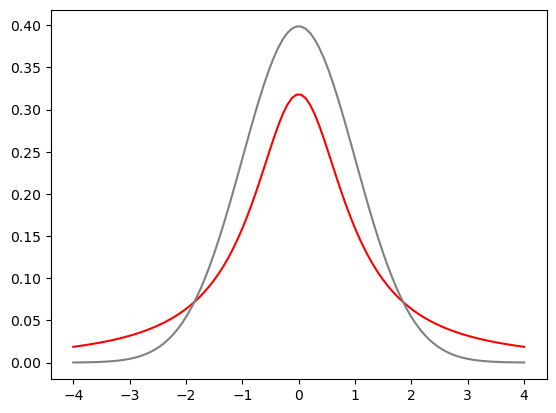

In [18]:
# t distribution
t = stats.t(df = 1)
x = np.linspace(-4, 4, 100)
plt.plot(x, t.pdf(x), color = "r")
plt.plot(x, Z.pdf(x), color = "grey")

#### Example: counting beetles

You have been asked to measure the density of a particular species of beetle in a field.

The following are the observed numbers in 10 samples using a 1 m<sup>2</sup> [quadrat](https://en.wikipedia.org/wiki/Quadrat).

In [20]:
# Observed data
data = np.array([5, 1, 6, 3, 2, 4, 2, 7, 1, 0])

Calculate a 95% confidence interval for the beetle density.

In [22]:
# First calculate sample mean and std
xbar = np.mean(data)
print(xbar)

# Use the ddof = 1 argument to use an unbiased estimator
s = np.std(data, ddof = 1)
print(s)

3.1
2.3309511649396115


In [25]:
# Build the appropriate t-distribution
T9 = stats.t(df = 9)

In [26]:
# Find the critical value
t95 = T9.interval(0.95)[1]
print(t95)

2.2621571627409915


In [27]:
# Finally calculate the 95% confidence interval for mu
ci = np.array([xbar - t95 * s / np.sqrt(10) , xbar + t95 * s / np.sqrt(10)])
print(ci)

[1.43253799 4.76746201]
